In [1]:
%pylab inline
import numpy as np
import pandas as pd
import os
import sys
sys.path.insert(0, '/home/jfm343/Documents/Delafossites/integration_delafossite/Modular')
# sys.path.insert(0, '/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite/Modular')
import Dispersion
import Lattice
from scipy import linalg as la
import seaborn as sns
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


In [2]:
pathMAC="/Users/juanmendezvalderrama/Documents/Proyectos/Delafossites/integration_delafossite"
pathchow='/home/jfm343/Documents/Delafossites/integration_delafossite'
# pathpc='/home/juan/Documents/Projects/BM_bandstructure'
# pathy=pathMAC
pathy=pathchow

In [3]:
# path=pathy+'/data/tempsweep_radial__2022-05-03-23-12-46'
path=pathy+'/data/tempsweep_radial_mac__2022-05-01-22-48-29'
path=pathy+'/data/tempsweep_radial__2022-04-30-16-05-32' #long
subpaths=os.listdir(path)
subpaths=list(filter(lambda a: a != 'inforun', subpaths))
def getdatadir(fulpath):
    data=[]
    for pa in fulpath:
        if ('data' in pa): data.append(pa)
    return data
frames=[]
for i, pat in enumerate(subpaths):
    # print(pat)
    fulpath=path+'/'+pat
    subpaths2=os.listdir(fulpath)
    data= getdatadir(subpaths2)
    fullpath=fulpath+'/'+data[0]
    print("reading data ",fullpath)
    
    dff = pd.read_hdf(fullpath)
    frames.append(dff)
    
df=pd.concat(frames).sort_values(['theta', 'nu'])


reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__6/data2022-04-30-09-50-45.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__5/data2022-04-30-08-02-38.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__9/data2022-04-30-14-47-39.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__8/data2022-04-30-13-19-19.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__2/data2022-04-30-02-50-07.h5
reading data  /home/jfm343/Documents/Delafossites/integration_delafossite/data/tempsweep_radial__2022-04-30-16-05-32/tempsweep_radial__10/data2022-04-30-16-05-31.h5
reading data  /

In [4]:
lamblist=np.array([4.178642027077301, 3.370944783098885, 3.1806350971738353, 3.106684811722399, 3.0703759314285626, 3.0498886949148036, 3.037203270341933, 3.028807008086399, 3.0229631820378184, 3.018732903302169])
xilist=np.array([0.7977001437529434, 0.44769799421336715, 0.3385934132942712, 0.2820654445433112, 0.24641327783634667, 0.22140855357460135, 0.20266334949870196, 0.18795373910710966, 0.17602044681425916, 0.16609148193650858])
Tlist=np.arange(1,11,1)

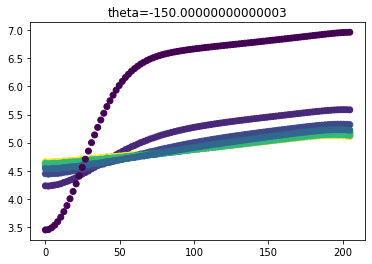

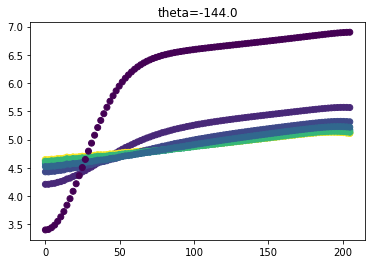

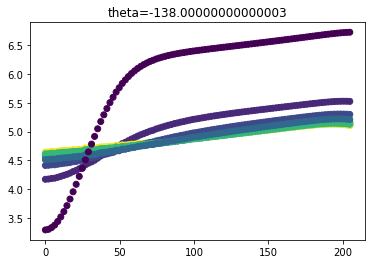

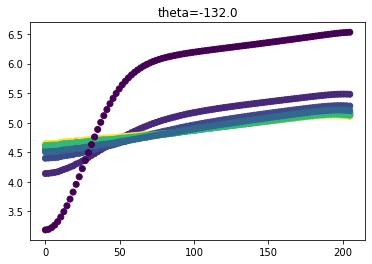

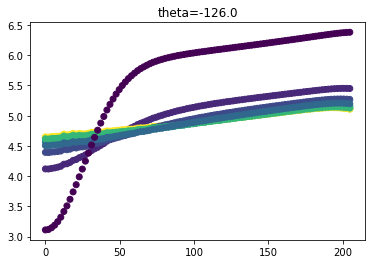

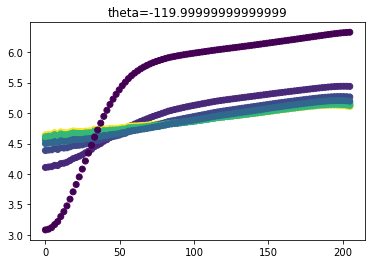

[  6.   5.   9.   8.   2.  10.  50.   3.   7. 100.   4.   1.]


In [5]:
# thets=df['theta'].unique()
# tss=df['T'].unique()

# for th in thets:
#     df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
#     ax2 = df2.plot( x='freq',y='SE', c='T',colormap='viridis', sharex=True, kind='scatter')
#     plt.title('theta='+str(th*180/np.pi))
    
# print(tss)

thets=df['theta'].unique()
tss=df['T'].unique()

for th in thets:
    df2=df.loc[(df['theta'] ==th )&(df['T'] <= 10)]
    plt.scatter(df2['freq'],df2['SE'], c=df2['T'] )
    plt.title('theta='+str(th*180/np.pi))
    plt.show()
    
print(tss)

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


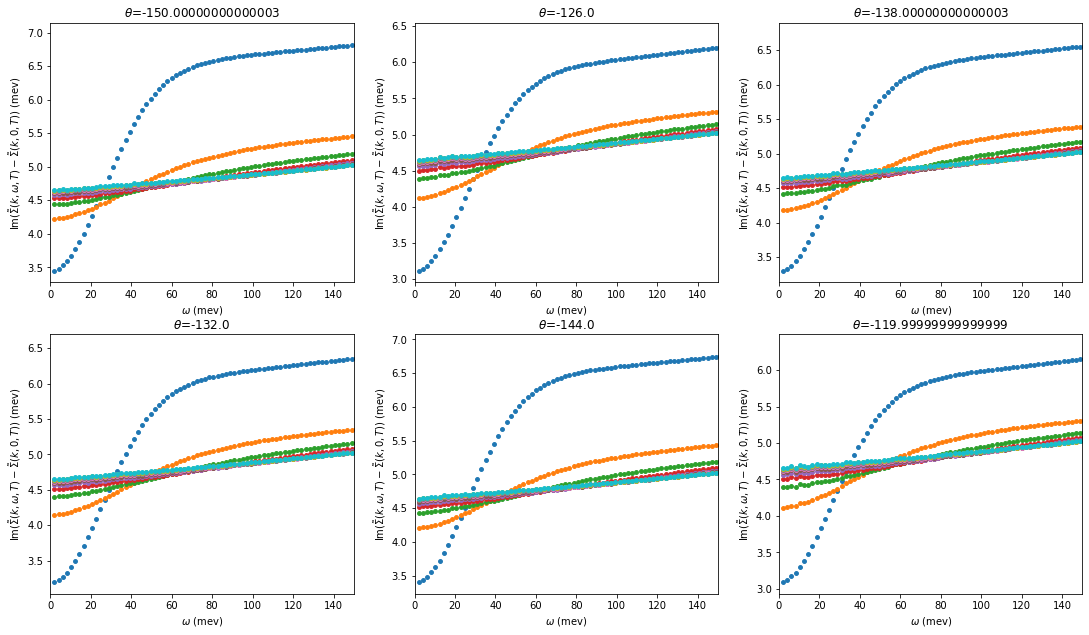

In [6]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,2.0,3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003
0 0 0


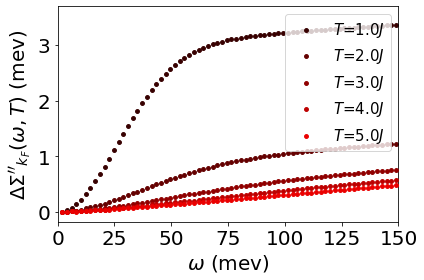

In [7]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(df['theta'].unique()[0]*180/np.pi)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0,4.0,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']-df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T)+r"$J$",s=15, color=cm.hot(T/15), zorder=T)
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()
plt.savefig("imgs/pap_fig1e", dpi=400)

[-2.6179938779914944]
0 0 0


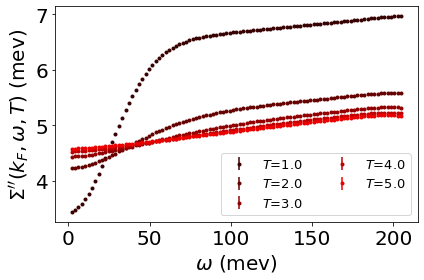

In [8]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
thets=[df['theta'].unique()[0]]
print(thets)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in [1.0,2.0,3.0, 4.0 ,5.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE']#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        axis.errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15))
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Sigma''(k_F,\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    axis.legend(prop={'size': 13}, loc=4, ncol=2)
    plt.tight_layout()
# plt.savefig("imgs/fig2c")

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


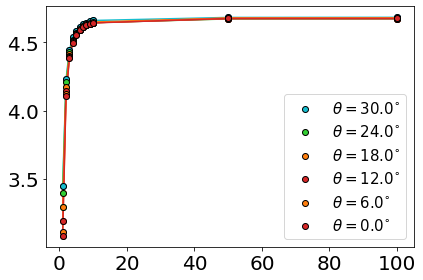

In [9]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red','tab:orange','tab:red']

for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'],df2['SE'],c=listcol[l], zorder=0)
    scatter(df2['T'],df2['SE'], edgecolor='k', label=r"$\theta =$"+str(-round(th*180/np.pi,1)-120)+r"$^{\circ}$", zorder=2, c=listcol[l])
    plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.savefig("imgs/pap_fig1b")
plt.tight_layout()    
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]


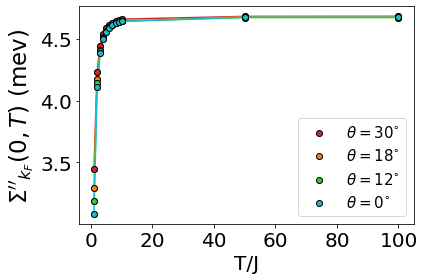

In [10]:

thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
listcol=['tab:cyan','limegreen','tab:orange','tab:red']
listcol=listcol[::-1]
thets=np.array([thets[0],thets[2],thets[3],thets[5]])
thlabel=[30,18,12,0]
for l,th in enumerate(thets):
    df2=df.loc[(df['freq'] ==0 )&(df['theta'] ==th )]

    plot(df2['T'],df2['SE'],c=listcol[l], zorder=0)
    scatter(df2['T'],df2['SE'], edgecolor='k', label=r"$\theta =$"+str(thlabel[l])+r"$^{\circ}$", zorder=2, c=listcol[l])
    plt.scatter(df2['T'],df2['SE'])
    xticks(size=20)
    yticks(size=20)
    pyplot.locator_params(axis='y', nbins=4)
    pyplot.locator_params(axis='x', nbins=7)
    legend(prop={'size': 15})
plt.xlabel('T/J', size=20)
plt.ylabel(r"$\Sigma''_{k_F}(0, T)$ (mev)", size=23)
plt.tight_layout()    
plt.savefig("imgs/pap_fig1b", dpi=400)
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

-150.00000000000003 [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
0 0 0
1 0 0
2 0 0
3 0 0
4 0 0
5 0 0


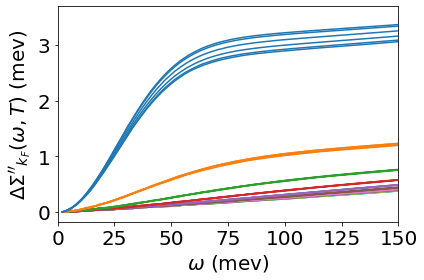

In [11]:
N,M=1,1
figure, axis = plt.subplots(N,M)
# figure.set_size_inches(18.5, 10.5)
# thets=[df['theta'].unique()[0]]
thets=df['theta'].unique()
Temps=np.array(df['T'].unique())[:-2]
print(df['theta'].unique()[0]*180/np.pi,Temps)
df=df.sort_values(by=['freq','T'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    a=[]
    for T in Temps:

        df3=df2.loc[(df2['T'] ==T )]
        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=df3['freq']
        y=df3['SE'] -df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        axis.plot(x[1:],(y[1:]),   label=r'$T$='+str(T)+r"$J$",  zorder=-T) #*lamblist[int(T)-1]/3
        # print(df3.iloc[0]['SE'])
        a.append(df3.iloc[0]['SE'])
        
        # # axis.errorbar(x[1::2],(y[1::2]),yerr=err[1::2] ,   label=r'$T$='+str(T), fmt='.', color=cm.hot(T/15), zorder=T)
        # axis.scatter(x[1:],y[1:]*lamblist[int(T)-1]/3,   label=r'$T$='+str(T)+r"$J$",s=15,  zorder=T) #*
        # # print(df3.iloc[0]['SE'])
        # a.append(df3.iloc[0]['SE'])
    
    
    # axis.set_title(r'$\theta$='+str(th*180/np.pi))
    # axis.set_ylabel(r"$\tilde{\Sigma}''(k,\omega, T)-\tilde{\Sigma}(k,0, T)$", size=20)
    axis.set_ylabel(r"$\Delta \Sigma''_{k_F}(\omega, T)$ (mev)", size=20)
    axis.set_xlabel(r"$\omega$ (mev)", size=20)
    axis.set_xlim([0,150])
    plt.xticks(size=20)
    plt.yticks(size=20)
    pyplot.locator_params(axis='y', nbins=5)
    pyplot.locator_params(axis='x', nbins=7)
    # axis.legend(prop={'size': 15}, loc=1)
plt.tight_layout()

In [12]:
def func(x, a, b):
    
    return a * x*x +b

[0.00083285 0.00302729]
[0.00029783 0.00041719]
[0.00015532 0.00014478]
[1.19855191e-04 8.62701876e-05]
[1.17427822e-04 6.90147608e-05]
[1.24748381e-04 6.34573413e-05]
[1.33889458e-04 6.17373878e-05]
[1.41411662e-04 6.13853462e-05]
[1.46887939e-04 6.14849975e-05]
[1.51068180e-04 6.17220416e-05]


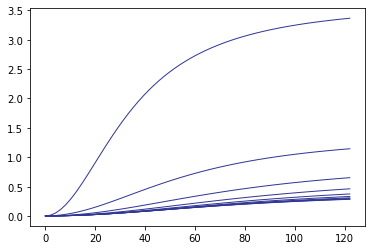

In [13]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):


    y=np.array(df['SE'])[:-40]
    y=(y-y[0])#/y[0]
    popt, pcov = curve_fit(scalingF, w[:-40],y,p0=[0.015,0.01])
    print(np.abs(popt))
    # plot(w[:-40], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='o', ls=':')
    plot(w[:-40], scalingF(w[:-40],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    
    alphaT.append(np.abs(popt[0]))
    AT.append(np.abs(popt[1]))
    Tf.append(T)
        
    return None


thets=df['theta'].unique()

thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        # show()

In [14]:
xilist=np.array([0.7977001437529434, 0.44769799421336715, 0.3385934132942712, 0.2820654445433112, 0.24641327783634667, 0.22140855357460135, 0.20266334949870196, 0.18795373910710966, 0.17602044681425916, 0.16609148193650858])
xilist_t=np.array([xilist[0],xilist[1],xilist[2],xilist[3],xilist[4]])

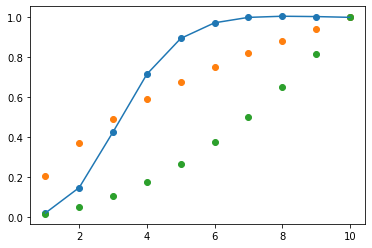

In [15]:
funcf=1/np.array(AT)
scatter(np.array(Tf), funcf/funcf[-1])
plot(np.array(Tf), funcf/funcf[-1])
funcf2=1/xilist
scatter(np.array(Tf), funcf2/funcf2[-1])
funcf2=1/(lamblist-3)
scatter(np.array(Tf), funcf2/funcf2[-1])
plt.show()

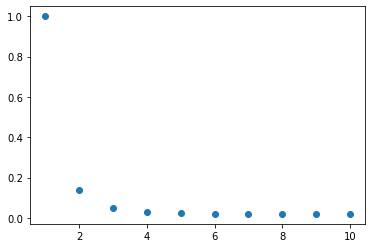

In [16]:
funcf=np.array(AT)
scatter(np.array(Tf), funcf/funcf[-0])
plt.show()

[0.00088668 0.00092856] 1.0
[2.86071776e-04 9.67523393e-05] 2.0
[1.28494285e-04 2.97612194e-05] 3.0
[8.20360845e-05 1.61588288e-05] 4.0
[6.73714343e-05 1.19453211e-05] 5.0
[6.35760767e-05 1.03668018e-05] 6.0
[6.37561921e-05 9.70000525e-06] 7.0
[6.51175440e-05 9.42355519e-06] 8.0
[6.66487913e-05 9.31661643e-06] 9.0
[6.80207205e-05 9.27214601e-06] 10.0
[0.00087351 0.00091924] 1.0
[2.86279785e-04 9.68686887e-05] 2.0
[1.29306832e-04 2.99363915e-05] 3.0
[8.28983269e-05 1.62998389e-05] 4.0
[6.82754918e-05 1.20701684e-05] 5.0
[6.46227312e-05 1.04958599e-05] 6.0
[6.47483103e-05 9.81441152e-06] 7.0
[6.60630867e-05 9.52781365e-06] 8.0
[6.77839228e-05 9.43797609e-06] 9.0
[6.90028233e-05 9.37527707e-06] 10.0
[0.00086468 0.0009129 ] 1.0
[2.86498929e-04 9.68428667e-05] 2.0
[1.29382476e-04 2.99135558e-05] 3.0
[8.28704905e-05 1.62798851e-05] 4.0
[6.82617280e-05 1.20594259e-05] 5.0
[6.45935169e-05 1.04840680e-05] 6.0
[6.48994017e-05 9.82458865e-06] 7.0
[6.63859532e-05 9.55581208e-06] 8.0
[6.80299500e-0

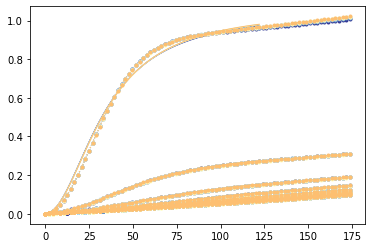

In [17]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=15

    y=np.array(df['SE'])[:-index]
    y=(y-y[0])/y[0]
    y2=(np.array(df['SE'])-np.array(df['SE'])[0])[:-40]
    # popt, pcov = curve_fit(scalingF, w[:-40],y2,p0=[0.015,0.01])
    popt, pcov = curve_fit(scalingF, w[:-index],y,p0=[0.015,0.01])
    print(np.abs(popt),T)
    slope =np.abs(popt[1])#np.array(AT)[int(T)-1]
    locat=np.abs(popt[0])#np.array(alphaT)[int(T)-1]

    facfunc=1/(slope/locat)
    facw=np.sqrt(locat)
    # plot(w[:-40]*facw, y2*facfunc, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    
    #for tanh
    # facfunc=1/(slope/locat)
    # facw=(locat)
    # plot(w[:-40]*facw, y2*facfunc, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    
    # plot(w[:-index]*facw, y*facfunc, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    # plot(w[:-index], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    plot(w[:-40], scalingF(w[:-40],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    plot(w[:-index], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    alphaT.append(np.abs(popt[0]))
    AT.append(np.abs(popt[1]))
    Tf.append(T)
        
    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        # show()

/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of

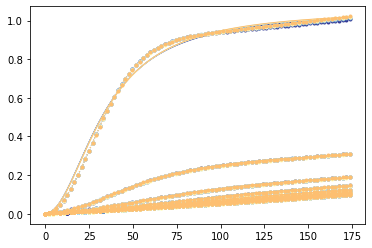

In [18]:

def scalingG(omega, alpha, A, f):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=15

    y=np.array(df['SE'])[:-index]
    y=(y-y[0])/y[0]

    popt, pcov = curve_fit(scalingG, w[:-index],y,p0=[0.015,0.01,0.00000001])
    

    plot(w[:-index], scalingG(w[:-index],popt[0],popt[1],popt[2]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    plot(w[:-index], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    alphaT.append(np.abs(popt[0]))
    AT.append(np.abs(popt[1]))
    Tf.append(T)
        
    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        # show()

[0.00083285 0.00089046]
[2.97827209e-04 9.91593094e-05]
[1.55316226e-04 3.26954100e-05]
[1.19854726e-04 1.90795520e-05]
[1.17426772e-04 1.51009681e-05]
[1.24748504e-04 1.38006228e-05]
[1.33889310e-04 1.33711711e-05]
[1.41410874e-04 1.32585509e-05]
[1.46887045e-04 1.32553069e-05]
[1.51067682e-04 1.32861941e-05]
[0.0008267  0.00088608]
[2.98355517e-04 9.93408622e-05]
[1.56582867e-04 3.29247698e-05]
[1.21609165e-04 1.92971891e-05]
[1.19594395e-04 1.53160507e-05]
[1.27468004e-04 1.40372727e-05]
[1.36436589e-04 1.35809292e-05]
[1.43739078e-04 1.34459228e-05]
[1.49735647e-04 1.34770314e-05]
[1.53338845e-04 1.34657847e-05]
[0.00082403 0.0008841 ]
[2.99665779e-04 9.95274359e-05]
[1.57508183e-04 3.29901756e-05]
[1.22633822e-04 1.93543775e-05]
[1.21186011e-04 1.54025448e-05]
[1.29677861e-04 1.41461640e-05]
[1.39808067e-04 1.37568511e-05]
[1.48153005e-04 1.36787009e-05]
[1.54340466e-04 1.37060232e-05]
[1.58946398e-04 1.37560333e-05]
[0.00082129 0.00088039]
[2.96657526e-04 9.83567959e-05]
[1.52863

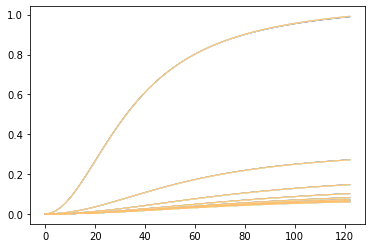

In [19]:
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT2=[]
AT2=[]
Tf2=[]
def fit(df, *args,axi,Q,w,l, T):


    y=np.array(df['SE'])[:-40]
    y=(y-y[0])/y[0]
    popt, pcov = curve_fit(scalingF, w[:-40],y,p0=[0.015,0.01])
    print(np.abs(popt))
    # plot(w[:-40], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='o', ls=':')
    plot(w[:-40], scalingF(w[:-40],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    
    alphaT2.append(np.abs(popt[0]))
    AT2.append(np.abs(popt[1]))
    Tf2.append(T)
        
    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        # show()

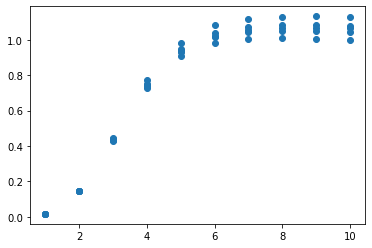

In [20]:
funcf=1/np.array(AT2)
scatter(np.array(Tf2), funcf/funcf[-1])
# plot(np.array(Tf2), funcf/funcf[-1])
# funcf2=1/xilist
# scatter(np.array(Tf2), funcf2/funcf2[-1])
# funcf2=1/(lamblist-3)
# scatter(np.array(Tf2), funcf2/funcf2[-1])
plt.show()

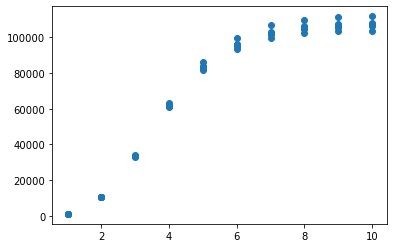

In [21]:
funcf=1/np.array(AT)
scatter(np.array(Tf), funcf, label='before ratio')

# funcf=1/np.array(AT2)
# scatter(np.array(Tf2), funcf, label='after ratio')
# legend()

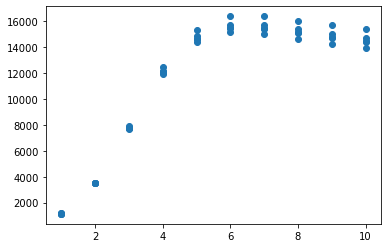

In [22]:
funcf=1/np.array(alphaT)
scatter(np.array(Tf), funcf, label='before ratio')

In [23]:
# # #electronic parameters
J=2*5.17 #in mev
tp1=568/J #in units of Js\
tp2=-tp1*108/568 #/tpp1
##coupling 
U=4000/J
g=100/J
Kcou=g*g/U
# fill=0.67 #van hove
fill=0.5


##########################
##########################
# Geometry/Lattice
##########################
##########################
Npoints=1000
Npoints_int_pre, NpointsFS_pre=2000,600
save=True
l=Lattice.TriangLattice(Npoints_int_pre, save,'CH1')
Vol_rec=l.Vol_BZ()
l2=Lattice.SQLattice(Npoints, save, 'CH1')
Vol_rec2=l2.Vol_BZ()



# ##########################
# ##########################
# # Fermi surface and structure factor
# ##########################
# ##########################
ed=Dispersion.Dispersion_TB_single_band([tp1,tp2],fill,'CH1')

# ed=Dispersion.Dispersion_circ([tp1,tp2],fill)
[KxFS,KyFS]=ed.FS_contour(NpointsFS_pre)

Machine arg is, CH1
Machine arg is, CH1
started calculating filling for chemical potential and dispersion parameters TB_single_band..
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
norm of Dos, 42.97093206665365 45.58575006211245
sum of the hist, normed? 42.97093206665365
finished calculating filling for chemical potential
Filling: 0.49313107609556217 .... chemical potential: 23.93702777725383
Machine arg is, CH1
reading lattice from... ./Lattices/KgridX1200.npy
reading lattice from... ./Lattices/KgridY1200.npy
sum of the hist, normed? 0.9999999999999923
starting contour.....
finished contour..... 6.949991941452026


2352 2513
227.9605415860735 -267.41895551257255 23.93702777725383 4000


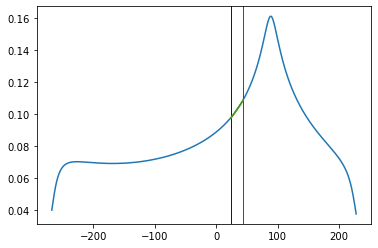

In [24]:

plt.plot(ed.earr,ed.Dos)
plt.axvline(ed.mu, c='b', lw=1)
plt.axvline(ed.mu+20, c='r', lw=1)



indmin=np.argmin((ed.earr-(ed.mu))**2)
indmax=np.argmin((ed.earr-(ed.mu+20))**2)
print(indmin, indmax)

plt.plot(ed.earr[indmin:indmax],ed.Dos[indmin:indmax])



print(np.max(ed.earr), np.min(ed.earr), ed.mu, np.size(ed.earr))

nu=ed.earr[indmin:indmax]-ed.mu
ome=np.linspace(-2*np.pi, 2*np.pi, 2000)
dome=ome[1]-ome[0]
rhonu=ed.Dos[indmin:indmax]

from scipy import stats
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)
plt.plot(ed.earr[indmin:indmax],ed.earr[indmin:indmax]*slope+intercept)


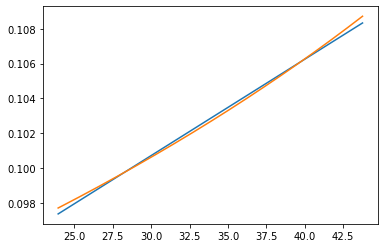

In [25]:
slope, intercept, r, p, se = stats.linregress(ed.earr[indmin:indmax], rhonu)
plt.plot(ed.earr[indmin:indmax],ed.earr[indmin:indmax]*slope+intercept)

plt.plot(ed.earr[indmin:indmax], rhonu)

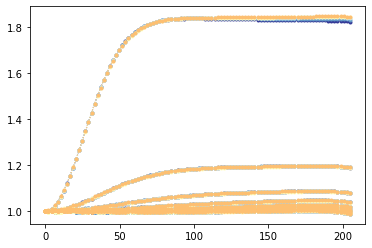

In [26]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=15

    y=np.array(df['SE'])
    
    line=(w/10.34 +ed.mu)*slope+intercept
    z=(y)/line

    plot(w, z/z[0] , linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')

    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        

/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


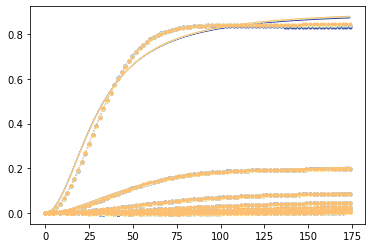

In [27]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=15

    y=np.array(df['SE'])
    
    line=(w/10.34 +ed.mu)*slope+intercept
    z=(y)/line
    
    y=((z-z[0])/z[0])[:-index]

    popt, pcov = curve_fit(scalingF, w[:-index],y,p0=[0.015,0.01])
    

    plot(w[:-index], scalingF(w[:-index],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    plot(w[:-index], y, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    alphaT.append(np.abs(popt[0]))
    AT.append(np.abs(popt[1]))
    Tf.append(T)

    # plot(w, z/z[0] , linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')

    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-2]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

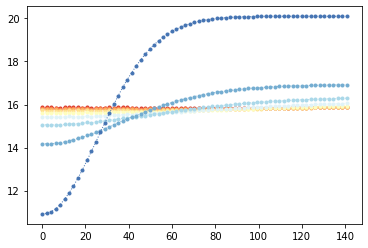

In [28]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 

    plot(omega, z/3, linewidth=1, color=plt.cm.RdYlBu_r(T/10.0), marker='.', ls=':',zorder=10-T)

    return None


thets=df['theta'].unique()[1:]

thets=[df['theta'].unique()[3]]
Temps=np.array(df['T'].unique())[:-3]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        

1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0


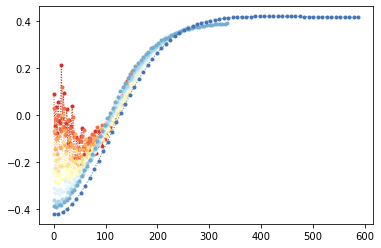

In [29]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    half=(np.max(z)+np.min(z))/2
    plot(omega*lamblist[int(T)-1]/(np.sqrt(T)), (z/z[0]-half/z[0])*T*T, linewidth=1, color=plt.cm.RdYlBu_r(T/10.0), marker='.', ls=':',zorder=10-T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    print(T)
    return None


thets=df['theta'].unique()[1:]

thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[:-3]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        

0.0 67.63758629478365 (69,) (69,)
1.0
0.0 67.11990986770311 (69,) (69,)
2.0
0.0 68.1391652458886 (69,) (69,)
3.0
0.0 67.43274825545231 (69,) (69,)
4.0
0.0 68.0629234649236 (69,) (69,)
5.0
0.0 67.82264707067841 (69,) (69,)
6.0
0.0 68.10961857503472 (69,) (69,)
7.0
0.0 68.71239740042444 (69,) (69,)
8.0
0.0 68.31570653404947 (69,) (69,)
9.0


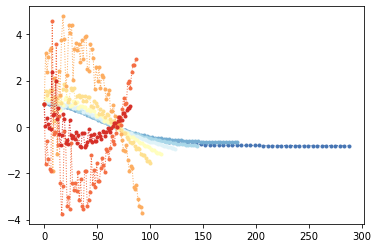

In [30]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    omegap=omega/np.sqrt(T/lamblist[int(T)-1])
    indi=np.argmin((omegap-68.244)**2)
    # axvline(omegap[indi])
    z=z-z[indi]
    print(z[indi],omegap[indi], np.shape(z), np.shape(omega))
    zz=z*(np.sqrt(T/lamblist[int(T)-1]))*(np.sqrt(T/lamblist[int(T)-1]))*(np.sqrt(T/lamblist[int(T)-1]))
    plot(omegap,zz/zz[0], linewidth=1, color=plt.cm.RdYlBu_r(T/10.0), marker='.', ls=':',zorder=T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    print(T)
    return None


thets=df['theta'].unique()[1:]

thets=[df['theta'].unique()[4]]
Temps=np.array(df['T'].unique())[:-3]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)
        

0.0 67.63758629478365 (69,) (69,)
1.0
0.0 67.11990986770311 (69,) (69,)
2.0
0.0 68.1391652458886 (69,) (69,)
3.0
0.0 67.43274825545231 (69,) (69,)
4.0
0.0 68.0629234649236 (69,) (69,)
5.0
0.0 67.82264707067841 (69,) (69,)
6.0
0.0 68.10961857503472 (69,) (69,)
7.0
0.0 68.71239740042444 (69,) (69,)
8.0
0.0 68.31570653404947 (69,) (69,)
9.0


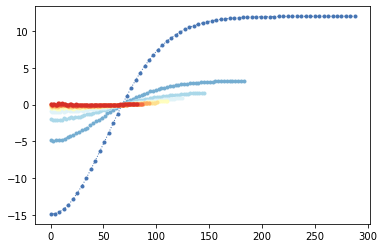

In [31]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

def scalingG(omega, alpha, A):
    return np.abs(A)*omega*omega+alpha

alphaT=[]
AT=[]

Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    omegap=omega/np.sqrt(T/lamblist[int(T)-1])
    indi=np.argmin((omegap-68.244)**2)
    # axvline(omegap[indi])
    z=z-z[indi]
    print(z[indi],omegap[indi], np.shape(z), np.shape(omega))
    zz=z
    
    # popt, pcov = curve_fit(scalingF, w[:-index],y,p0=[0.015,0.01])
    # plot(w[:-index], scalingF(w[:-index],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    
    plot(omegap,zz, linewidth=1, color=plt.cm.RdYlBu_r(T/10.0), marker='.', ls=':',zorder=T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    print(T)
    return None


thets=df['theta'].unique()[1:]

thets=[df['theta'].unique()[4]]
Temps=np.array(df['T'].unique())[:-3]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

0.0 68.244 (69,) (69,)
2.0
0.0 46.87466666666668 (69,) (69,)
3.0
0.0 35.156000000000006 (69,) (69,)
4.0
0.0 28.124800000000004 (69,) (69,)
5.0
0.0 23.43733333333334 (69,) (69,)
6.0
0.0 20.08914285714286 (69,) (69,)
7.0
0.0 68.244 (69,) (69,)
2.0
0.0 46.87466666666668 (69,) (69,)
3.0
0.0 35.156000000000006 (69,) (69,)
4.0
0.0 28.124800000000004 (69,) (69,)
5.0
0.0 23.43733333333334 (69,) (69,)
6.0
0.0 20.08914285714286 (69,) (69,)
7.0
0.0 68.244 (69,) (69,)
2.0
0.0 46.87466666666668 (69,) (69,)
3.0
0.0 35.156000000000006 (69,) (69,)
4.0
0.0 28.124800000000004 (69,) (69,)
5.0
0.0 23.43733333333334 (69,) (69,)
6.0
0.0 20.08914285714286 (69,) (69,)
7.0
0.0 68.244 (69,) (69,)
2.0
0.0 46.87466666666668 (69,) (69,)
3.0
0.0 35.156000000000006 (69,) (69,)
4.0
0.0 28.124800000000004 (69,) (69,)
5.0
0.0 23.43733333333334 (69,) (69,)
6.0
0.0 20.08914285714286 (69,) (69,)
7.0
0.0 68.244 (69,) (69,)
2.0
0.0 46.87466666666668 (69,) (69,)
3.0
0.0 35.156000000000006 (69,) (69,)
4.0
0.0 28.1248000000000

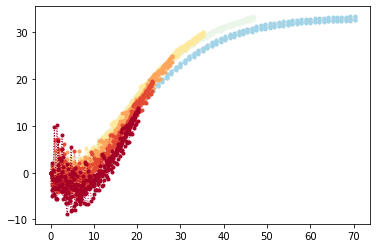

In [32]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

def scalingG(omega, alpha, A):
    return np.abs(A)*omega*omega+alpha

alphaT=[]
AT=[]

Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    omegap=omega/(T)
    indi=np.argmin((omegap-68.244)**2)
    # axvline(omegap[indi])
    z=z-z[indi]
    print(z[indi],omegap[indi], np.shape(z), np.shape(omega))
    zz=z
    
    popt, pcov = curve_fit(scalingG, omegap[:indi],zz[:indi],p0=[0.015,0.01])
    # plot(omegap[:indi], scalingG(omegap[:indi],popt[0],popt[1]), linewidth=10, color=plt.cm.RdYlBu_r(l/6.0))
    
    plot(omegap,T*T*(zz-zz[0]), linewidth=1, color=plt.cm.RdYlBu_r(T/7.0), marker='.', ls=':',zorder=T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    print(T)
    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[4]]
Temps=np.array(df['T'].unique())[1:-5]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

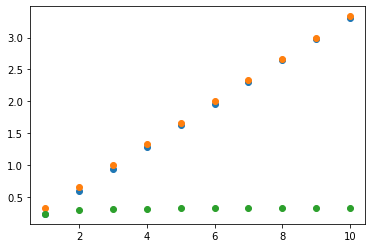

In [33]:
scatter(Tlist,Tlist/lamblist)
scatter(Tlist,Tlist/3)
scatter(Tlist,1/lamblist)

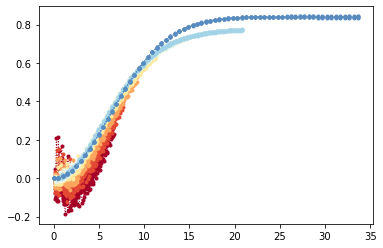

In [34]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

def scalingG(omega, alpha, A):
    return np.abs(A)*omega*omega+alpha

alphaT=[]
AT=[]

Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    omegap=omega/(T)
    
    plot(omegap/(lamblist[int(T)-1]),(T*T*(z-z[0])/z[0]), linewidth=1, color=plt.cm.RdYlBu_r(T/7.0), marker='.', ls=':',zorder=10-T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')

    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[4]]
Temps=np.array(df['T'].unique())[:-5]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

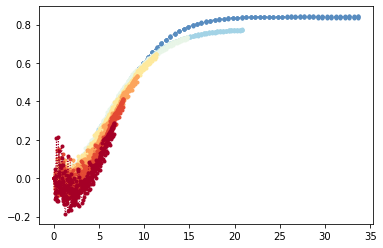

In [35]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*omega*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

def scalingG(omega, alpha, A):
    return np.abs(A)*omega*omega+alpha

alphaT=[]
AT=[]

Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=-31

    y=np.array(df['SE'])[:index]
    omega=w[:index]
    line=(omega/10.34 +ed.mu)*slope+intercept
    z=(y)/line 
    omegap=omega/(T)
    
    plot(omegap/(lamblist[int(T)-1]),(T*T*(z-z[0])/z[0]), linewidth=1, color=plt.cm.RdYlBu_r(T/7.0), marker='.', ls=':',zorder=T)
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')

    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[4]]
Temps=np.array(df['T'].unique())[:-5]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

/home/jfm343/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


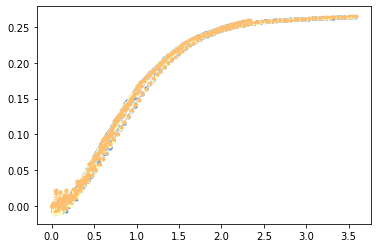

In [36]:
# def scalingF(omega, alpha, A):
#     return np.abs(A)*np.tanh(np.abs(alpha)*omega)
def scalingF(omega, alpha, A):
    return np.abs(A)*omega*omega/(1+np.abs(alpha)*omega*omega)

alphaT=[]
AT=[]
Tf=[]
def fit(df, *args,axi,Q,w,l, T):
    index=15

    y=np.array(df['SE'])
    
    line=(w/10.34 +ed.mu)*slope+intercept
    z=(y)/line
    
    y=((z-z[0])/z[0])[:-index]

    popt, pcov = curve_fit(scalingF, w[:-index],y,p0=[0.015,0.01])
    slopea =np.abs(popt[1])#np.array(AT)[int(T)-1]
    locata=np.abs(popt[0])#np.array(alphaT)[int(T)-1]

    facfunc=1/(slopea/locata)
    facw=np.sqrt(locata)
    

    # plot(w[:-index], scalingF(w[:-index],popt[0],popt[1]), linewidth=1, color=plt.cm.RdYlBu_r(l/6.0))
    plot(w[:-index]*facw, y*facfunc/lamblist[int(T)-1], linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    alphaT.append(np.abs(popt[0]))
    AT.append(np.abs(popt[1]))
    Tf.append(T)

    # plot(w, z/z[0] , linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')
    # plot(w, line, linewidth=1, color=plt.cm.RdYlBu_r(l/6.0), marker='.', ls=':')

    return None


thets=df['theta'].unique()[1:]

# thets=[df['theta'].unique()[1]]
Temps=np.array(df['T'].unique())[1:-5]
for l,th in enumerate(thets):
    for TT in Temps:
        df2=df.loc[(df['theta'] ==th )&(df['T'] ==TT )]
        w=df2['freq'].unique()
        fit(df2, 'Q', 'freq', 'SE', axi= 2, Q=1,w=w,l=l, T=TT)

In [37]:
Tf

[2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0]

In [38]:
lamblist

array([4.17864203, 3.37094478, 3.1806351 , 3.10668481, 3.07037593,
       3.04988869, 3.03720327, 3.02880701, 3.02296318, 3.0187329 ])

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


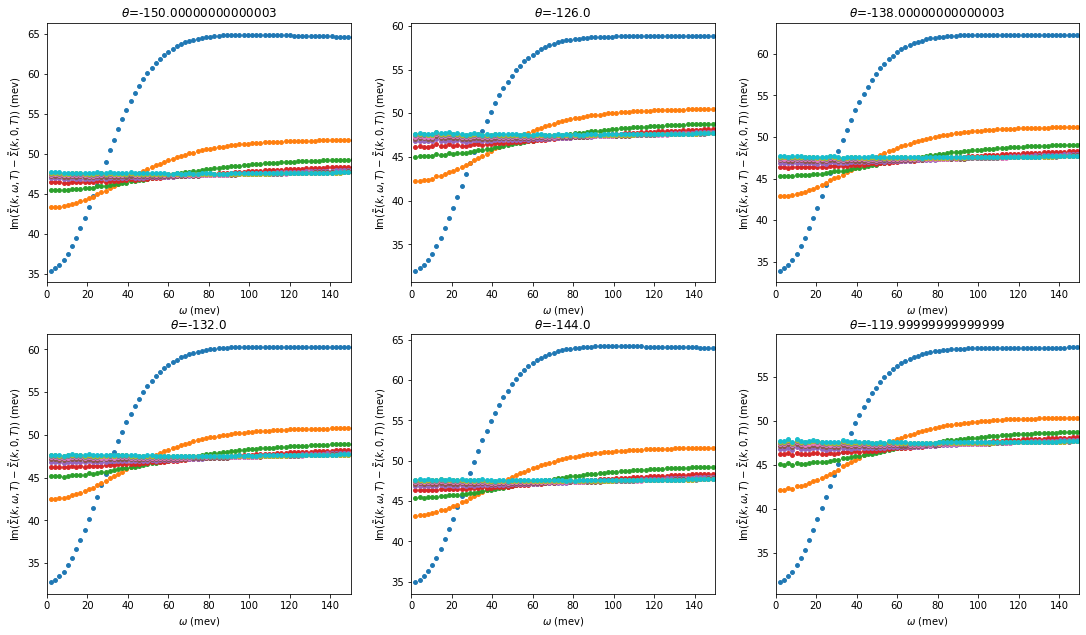

In [39]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    for T in [1.0,2.0,3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        y=np.array(df3['SE'])/line#-df3.iloc[1]['SE']
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].scatter(x[1:],(y[1:]) ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
        
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

In [40]:
from scipy.special import spence as dilog2
def analytical_form(omega,T, alpha):
    Jpre=10.34
    Ji=alpha*Jpre
    exp_sum=np.exp(-(omega+Ji)/T)
    exp_dif=np.exp(-(omega-Ji)/T)
    exp_zero=np.exp(Ji/T)
    dilog_1=dilog2(1-(-exp_sum))
    dilog_2=dilog2(1-(-exp_dif))
    dilog_3=dilog2(1-(1-exp_zero))
    dilogterms=-dilog_2+dilog_1-2*dilog_3
    logterm=np.log((1/exp_sum+1)*(1/exp_dif+1))
    num=-Ji*Ji/2 +T*T*dilogterms-Ji*T*logterm+2*Ji*omega
    den=J*T
    
    return num/den
    

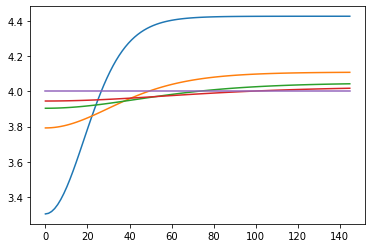

In [41]:
J=10.34
x=np.linspace(0,14,100)
for TT in [1,2,3,4,100]:
    anf=analytical_form(x*J,TT*J, 2) 
    plot(x*J, anf )

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


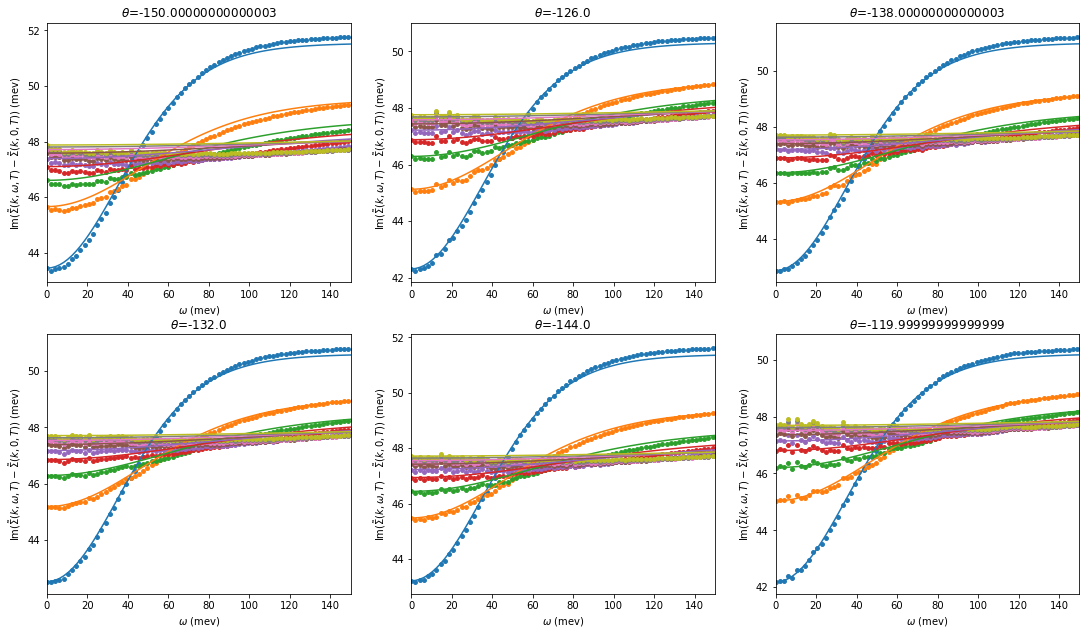

In [42]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    alph=3.7
    for T in [2.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        anf_pre=(analytical_form(x,T*10.34, alph) -2*alph)
        y=np.array(df3['SE'])/(line)#-df3.iloc[1]['SE']
        fac_amp=(y[-1]-y[0])/(anf_pre[-1]-anf_pre[0])
        shift=y[0]
        anf=(analytical_form(x,T*10.34, alph) -2*alph)*fac_amp
        anf=anf-anf[0]+y[0]
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].plot(x,anf ,   label=r'$T$='+str(T))
        axis[i,j].scatter(x,y ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    for T in [3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        y=np.array(df3['SE'])/(line)#-df3.iloc[1]['SE']
        anf=(analytical_form(x,T*10.34, alph) -2*alph)*fac_amp
        anf=anf-anf[0]+y[0]
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].plot(x,anf ,   label=r'$T$='+str(T))
        axis[i,j].scatter(x,y ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
1 1 1
2 0 2
3 1 0
4 0 1
5 1 2


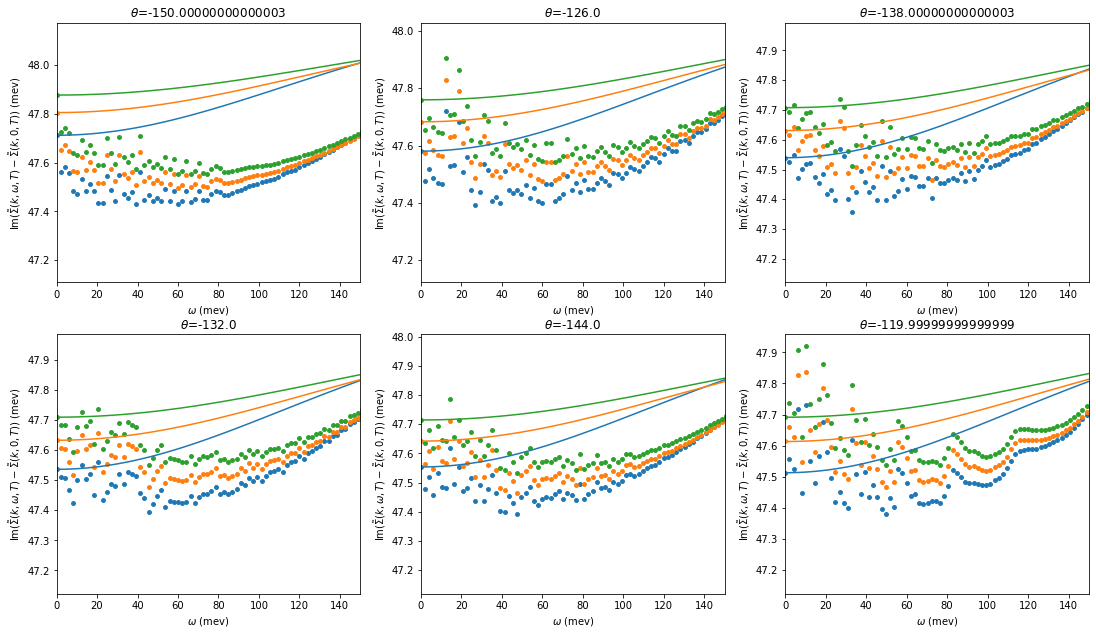

In [43]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    alph=3.7
    for T in [2.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        anf_pre=(analytical_form(x,T*10.34, alph) -2*alph)
        y=np.array(df3['SE'])/(line)#-df3.iloc[1]['SE']
        fac_amp=(y[-1]-y[0])/(anf_pre[-1]-anf_pre[0])
        shift=y[0]
        anf=(analytical_form(x,T*10.34, alph) -2*alph)*fac_amp
        anf=anf-anf[0]+y[0]
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        # axis[i,j].plot(x,anf ,   label=r'$T$='+str(T))
        # axis[i,j].scatter(x,y ,   label=r'$T$='+str(T),s=15)
        # axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    for T in [ 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        y=np.array(df3['SE'])/(line)#-df3.iloc[1]['SE']
        anf=(analytical_form(x,T*10.34, alph) -2*alph)*fac_amp
        anf=anf-anf[0]+y[0]
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].plot(x,anf ,   label=r'$T$='+str(T))
        axis[i,j].scatter(x,y ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')

[-2.61799388 -2.51327412 -2.40855437 -2.30383461 -2.19911486 -2.0943951 ]
0 0 0
5.326036568153173
33.349737498947704 43.4424745029161 -10.092737003968395 0.7676758260330931
36.400436690991675 45.658139713719805 -9.25770302272813 0.7972387162338486
37.64463861564779 46.603000743540626 -8.958362127892833 0.8077728475642312
38.25779398435856 47.09837544149898 -8.840581457140424 0.8122954056425719
38.601565710807506 47.38653157693424 -8.784965866126733 0.8146104900742961
38.81264290238686 47.58142291134491 -8.768780008958046 0.8157100088138118
38.95120499710909 47.7115007033234 -8.760295706214315 0.8163902711699005
39.04692562218238 47.80439258795828 -8.757466965775905 0.8168062286397114
39.11575860428084 47.87603280921408 -8.76027420493324 0.8170217185738233
1 1 1
5.300293483956934
33.18854350612171 43.21273175246957 -10.024188246347862 0.7680269716858391
36.22449732322256 45.482202161512134 -9.257704838289577 0.7964543404161812
37.462685471124864 46.44150025748317 -8.978814786358306 0.80

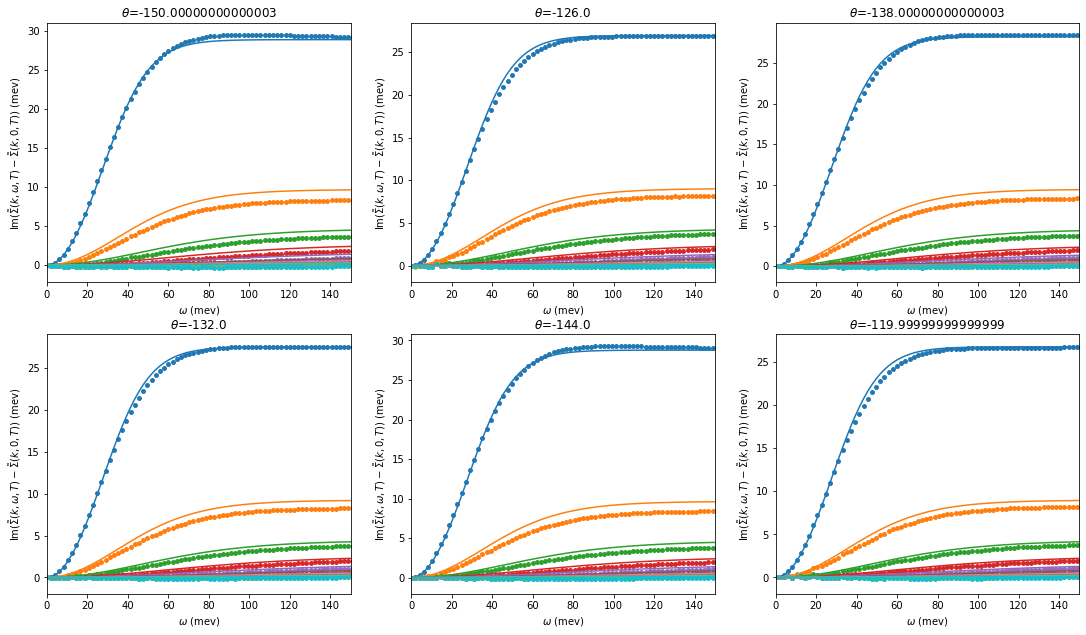

In [62]:
N,M=2,3
figure, axis = plt.subplots(N,M)
figure.set_size_inches(18.5, 10.5)
thets=df['theta'].unique()
print(thets)
df=df.sort_values(by=[ 'freq','T','theta'])
for l,th in enumerate(thets):
    df2=df.loc[(df['theta'] ==th )]
    Ts=df2['T'].unique()
    i=int(l%N)
    j=int((l%M))
    print(l,i,j)
    alph=3.7
    for T in [1.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        anf_pre=(analytical_form(x,T*10.34, alph) )
        y=np.array(df3['SE'])/(line)
        fac_amp=(y[-1]-y[0])/(anf_pre[-1]-anf_pre[0])
        shift=y[0]
        anf=anf_pre*fac_amp
        anf=anf
        print(fac_amp)
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].plot(x,anf-anf[0] ,   label=r'$T$='+str(T))
        axis[i,j].scatter(x,y-y[0] ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    for T in [2.0,3.0,4.0, 5.0,6.0,7.0, 8.0,9.0,10.0]:
        
        df3=df2.loc[(df2['T'] ==T )]
        line=(w/10.34 +ed.mu)*slope+intercept

        # df2['SE'].loc[(df['nu'] ==nu )]
        # plt.scatter(df3['freq'],df3['SE']-df3.iloc[0]['SE'], label=r'$\nu$='+str(nu))
        x=np.array(df3['freq'])
        line=(x/10.34 +ed.mu)*slope+intercept
        y=np.array(df3['SE'])/(line)
        anf=(analytical_form(x,T*10.34, alph))*fac_amp
        anf=anf
        print(anf[0], y[0],anf[0]- y[0],anf[0]/y[0])
       
        
            
        err=df3['error']
        # axis[i,j].errorbar(x[1:],(y[1:]),yerr=err[1:] ,   label=r'$T$='+str(T), fmt='o')
        axis[i,j].plot(x,anf-anf[0] ,   label=r'$T$='+str(T))
        axis[i,j].scatter(x,y-y[0] ,   label=r'$T$='+str(T),s=15)
        axis[i,j].set_xlim([0,150])
        # print(df3.iloc[0]['SE'])
    axis[i,j].set_title(r'$\theta$='+str(th*180/np.pi))
    axis[i,j].set_ylabel(r"Im($\tilde{\Sigma}(k,\omega, T)-\tilde{\Sigma}(k,0, T)$) (mev)")
    axis[i,j].set_xlabel(r"$\omega$ (mev)")
    # axis[i,j].legend()
plt.show()
    # ax2 = df2.plot( x='freq',y='SE', c='nu',colormap='viridis', sharex=True, kind='scatter')